# ***`-BAGGING-`*** in classification

In [2]:
import seaborn as sns
import numpy as np
import pandas as pd

In [3]:
df = sns.load_dataset('iris')

In [4]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['species'] = le.fit_transform(df['species'])

In [14]:
df = df[df['species']!=0]

In [22]:
df = df.iloc[:, [1, 2, -1]]
# y = df.iloc[:, -1]

In [21]:
x
# y = df.iloc[:, -1]

,sepal_width,petal_length,species
50,3.2,4.7,1
51,3.2,4.5,1
52,3.1,4.9,1
53,2.3,4.0,1
54,2.8,4.6,1
...,...,...,...
145,3.0,5.2,2
146,2.5,5.0,2
147,3.0,5.2,2
148,3.4,5.4,2


In [16]:
# y.shape, x.shape

((100,), (100, 2))

<Axes: xlabel='sepal_width', ylabel='petal_length'>

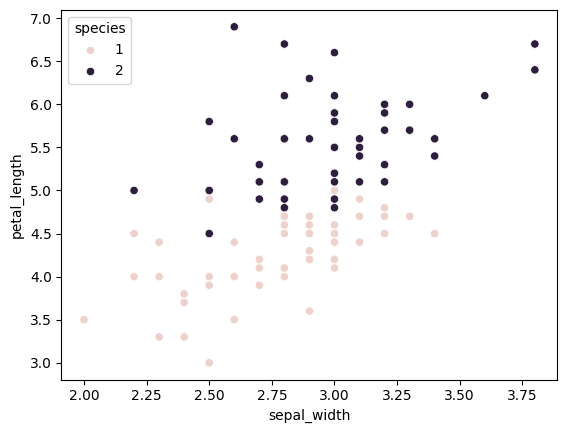

In [17]:
sns.scatterplot(data = df, x='sepal_width',y= 'petal_length', hue='species')

In [172]:
df = df.sample(df.shape[0])

df_train = df.iloc[:60,:].sample(45)
df_val = df.iloc[60:80,:].sample(5)
df_test = df.iloc[80:,:].sample(5)

In [173]:
df_test

,sepal_width,petal_length,species
69,2.5,3.9,1
122,2.8,6.7,2
86,3.1,4.7,1
99,2.8,4.1,1
76,2.8,4.8,1


In [174]:
df_val

,sepal_width,petal_length,species
91,3.0,4.6,1
142,2.7,5.1,2
106,2.5,4.5,2
90,2.6,4.4,1
71,2.8,4.0,1


In [175]:
x_test = df_val.iloc[:, 0:2].values 
y_test = df_val.iloc[:, -1].values 

># Case 1 - Bagging

Train Decision Tree models

In [176]:
df_bag1 = df_train.sample(15, replace=True)
X1 = df_bag1.iloc[:, 0:2]
y1 = df_bag1.iloc[:, -1]

In [177]:
df_bag1

,sepal_width,petal_length,species
130,2.8,6.1,2
67,2.7,4.1,1
141,3.1,5.1,2
117,3.8,6.7,2
125,3.2,6.0,2
88,3.0,4.1,1
113,2.5,5.0,2
114,2.8,5.1,2
113,2.5,5.0,2
74,2.9,4.3,1


In [178]:
X1.shape, y1.shape

((15, 2), (15,))

In [179]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score 
import matplotlib.pyplot as plt

In [180]:
dt_bag1 = DecisionTreeClassifier()
dt_bag1.fit(X1, y1)


DecisionTreeClassifier()

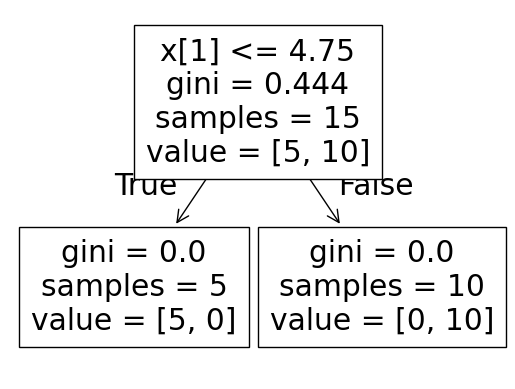

c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Accuracy score 0.8


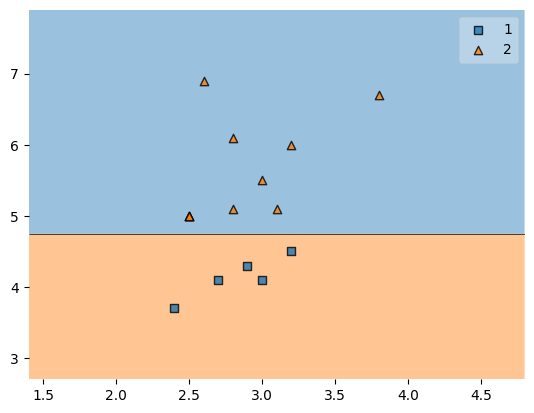

In [181]:

plot_tree(dt_bag1)
plt.show()
plot_decision_regions(X1.values, y1.values, clf=dt_bag1)
y_pred1 = dt_bag1.predict(x_test)
print("Accuracy score", accuracy_score(y_test, y_pred1))

In [182]:
df_bag2 = df_train.sample(15, replace=True)
X2 = df_bag2.iloc[:, 0:2]
y2 = df_bag2.iloc[:, -1]

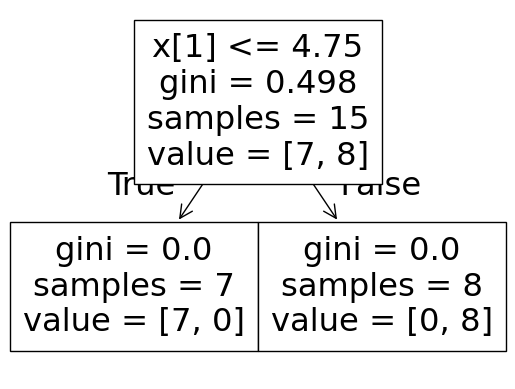

c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Accuracy score 0.8


c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


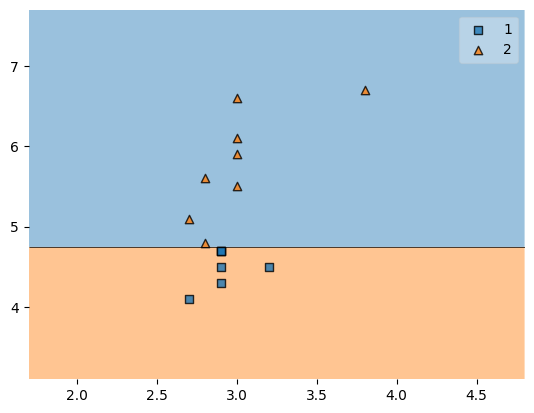

In [183]:
dt_bag2 = DecisionTreeClassifier()
dt_bag2.fit(X2, y2)
plot_tree(dt_bag2)
plt.show()
plot_decision_regions(X2.values, y2.values, clf=dt_bag2)
y_pred2 = dt_bag2.predict(x_test)
print("Accuracy score", accuracy_score(y_test, y_pred2))

In [184]:
df_bag3 = df_train.sample(15, replace=True)
X3 = df_bag3.iloc[:, 0:2]
y3 = df_bag3.iloc[:, -1]

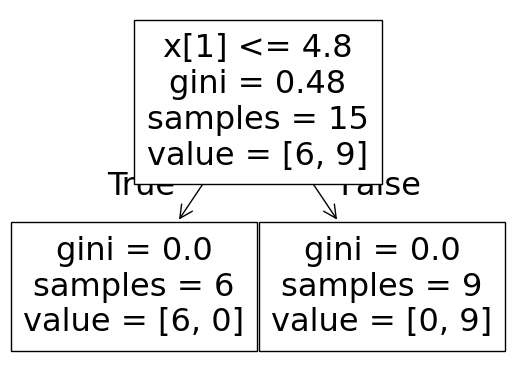

c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Accuracy score 0.8


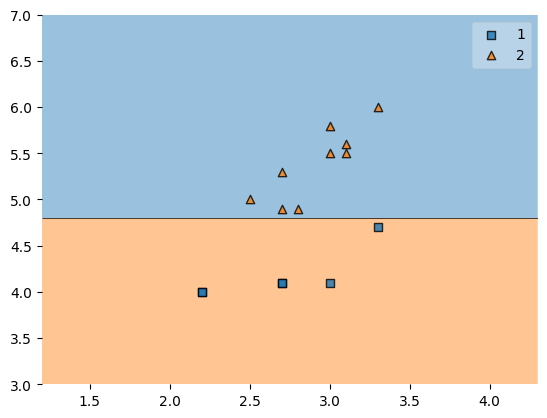

In [185]:

dt_bag3 = DecisionTreeClassifier()
dt_bag3.fit(X3, y3)
plot_tree(dt_bag3)
plt.show()
plot_decision_regions(X3.values, y3.values, clf=dt_bag3)
y_pred3 = dt_bag3.predict(x_test)
print("Accuracy score", accuracy_score(y_test, y_pred3))

### Prediction

In [186]:
df_test = df.iloc[80:,:].sample(5)
df_test

,sepal_width,petal_length,species
75,3.0,4.4,1
108,2.5,5.8,2
122,2.8,6.7,2
96,2.9,4.2,1
119,2.2,5.0,2


In [199]:
print("Predictor 1", dt_bag1.predict(np.array([2.9, 4.7]).reshape(1, 2)))
print("Predictor 2", dt_bag2.predict(np.array([2.9, 4.7]).reshape(1, 2)))
print("Predictor 3", dt_bag3.predict(np.array([2.9, 4.7]).reshape(1, 2)))

Predictor 1 [1]
Predictor 2 [1]
Predictor 3 [1]


c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


## Pasting
Row sampling without replacement  

## Random Subspaces
Column sampling with replacement `(used when there is large no of cols)`

## Random Patches
Both Row and Column sampling `(used when there is large no of cols)`

In [ ]:
# random subspaces(Column sampling)
df.sample(2, replace=True, axis=1)

,petal_length,sepal_width
114,5.1,2.8
57,3.3,2.4
59,3.9,2.7
126,4.8,2.8
149,5.1,3.0
...,...,...
87,4.4,2.3
53,4.0,2.3
55,4.5,2.8
86,4.7,3.1


In [204]:
# Random Patches(Row and Column Sampling)
df.sample(8, replace=True).sample(2, replace=True, axis=1)
# OR
df.sample(2, replace=True, axis=1).sample(10, replace=True)


,petal_length,petal_length
141,5.1,5.1
133,5.1,5.1
91,4.6,4.6
90,4.4,4.4
59,3.9,3.9
138,4.8,4.8
119,5.0,5.0
128,5.6,5.6
72,4.9,4.9
85,4.5,4.5
